In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [6]:
# load the data
X, y = load_wine(return_X_y=True)

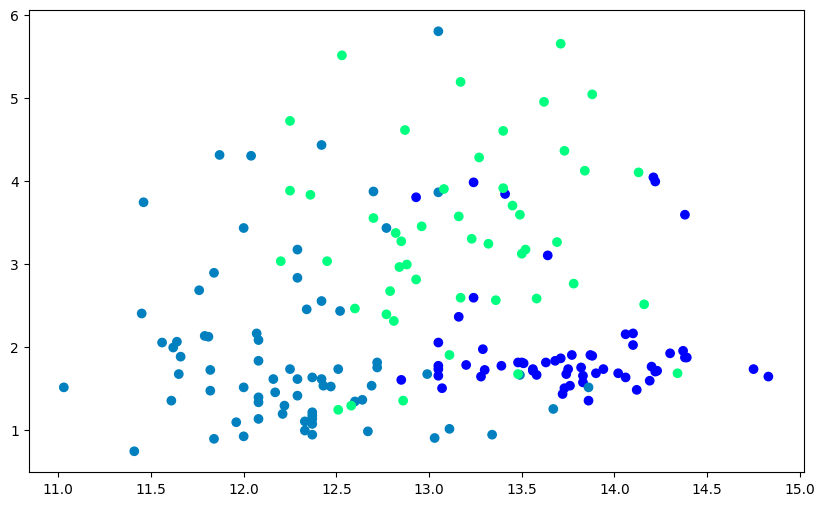

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse_output=False)

y_train = one_hot.fit_transform(y_train.reshape(-1, 1))

In [31]:
def softmax(z):

    exp_value = np.exp(z - np.max(z, axis=1, keepdims=True))

    exp_value_sum = np.sum(exp_value, axis=1,keepdims=True)

    return (exp_value / exp_value_sum)

In [35]:
class Softmax_Regression():

    def __init__(self, learning_rate, epochs):
        
        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.random.randn(X_train.shape[1], y_train.shape[1]) * 0.01

        for i in range(self.epochs):

            y_hat = softmax(np.dot(X_train, self.coef_))
            
            coef_slope = np.dot(X_train.T, (y_hat - y_train)) / X_train.shape[0]

            self.coef_ = self.coef_ - (self.lr * coef_slope)
        
        print(f"Coef_slope: {coef_slope}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = np.argmax(softmax(np.dot(X_test, self.coef_)), axis=1)

        return y_pred
            

In [36]:
lg_soft = Softmax_Regression(learning_rate=0.00001, epochs=100)

In [37]:
lg_soft.fit(X_train, y_train)

Coef_slope: [[ 5.00884026e-02 -7.34803725e-02  2.33919700e-02]
 [ 5.45064111e-01 -7.28467754e-01  1.83403643e-01]
 [ 1.73266063e-01  4.64052502e-03 -1.77906588e-01]
 [ 9.80004442e-02 -1.28145969e-01  3.01455247e-02]
 [ 1.34270864e+00 -1.56670381e+00  2.23995174e-01]
 [ 3.56259820e+00 -5.82177632e+00  2.25917812e+00]
 [ 1.92135415e-02 -1.90351952e-01  1.71138411e-01]
 [-7.85205733e-02 -2.35791787e-01  3.14312360e-01]
 [ 3.08078007e-02 -1.91215413e-02 -1.16862594e-02]
 [ 2.36883986e-02 -1.55876653e-01  1.32188255e-01]
 [ 2.84632639e-01  3.49420336e-01 -6.34052975e-01]
 [ 2.75690041e-02 -1.17836114e-01  9.02671102e-02]
 [ 1.59175512e-02 -2.99726996e-01  2.83809445e-01]
 [-4.39610479e-01  8.45854684e-01 -4.06244205e-01]]


In [38]:
y_pred = lg_soft.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)

In [40]:
acc_score

0.6944444444444444